Valid:
* TOB3_long2
* TOB3_long3
* TOB3_long4

'camp2ascii_2.log'

Keeping .camp2ascii_4.log since it looks like a camp2ascii log file.
Keeping .camp2ascii_3.log since it looks like a camp2ascii log file.
Keeping .camp2ascii_1.log since it looks like a camp2ascii log file.
Keeping .camp2ascii_6.log since it looks like a camp2ascii log file.
Keeping .camp2ascii_2.log since it looks like a camp2ascii log file.
Keeping .camp2ascii_5.log since it looks like a camp2ascii log file.


Processing files: 100%|██████████| 216k/216k [00:00<00:00, 920kB/s] 


2026-02-19 09:46:10.005000 2026-02-19 09:46:17.400000


ValueError: operands could not be broadcast together with shapes (1458,17) (1386,17) 

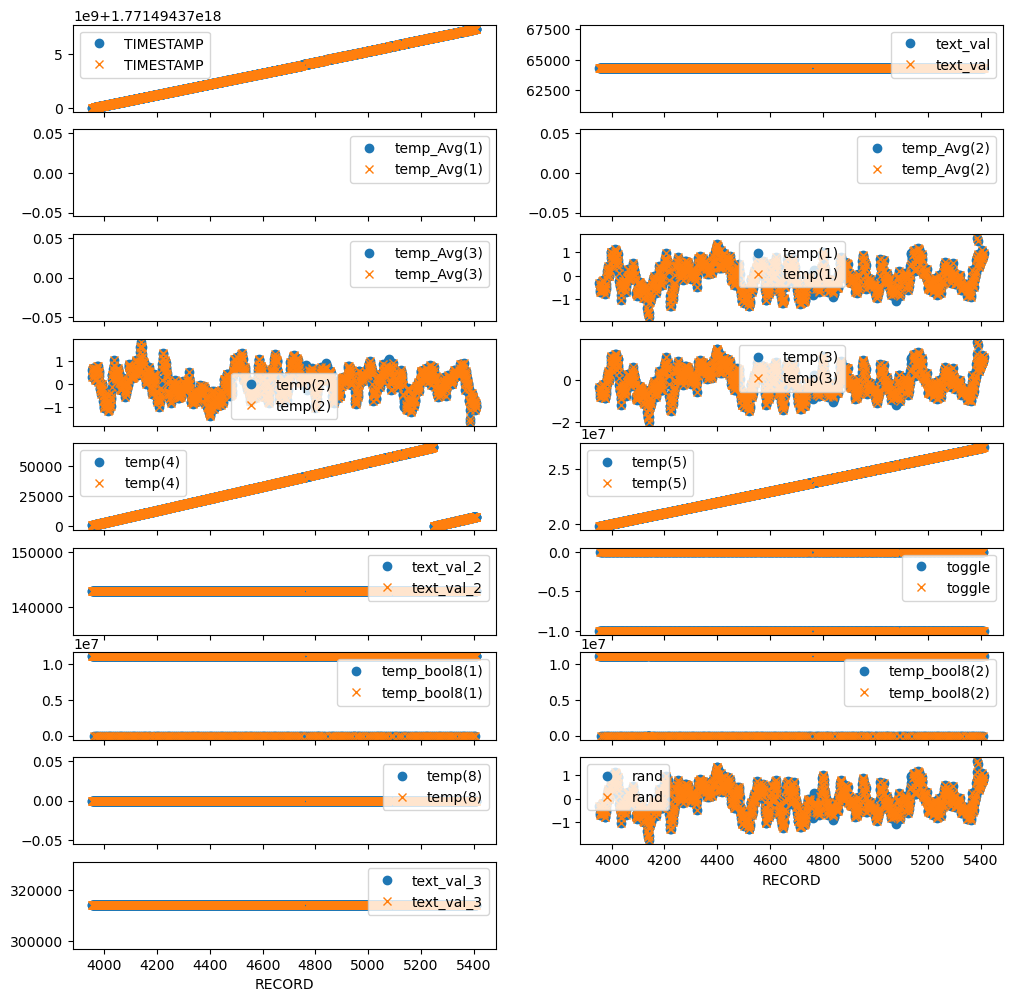

In [ ]:
from unittest import TestCase
from math import ceil
from pathlib import Path
import warnings


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import camp2ascii.formats as fmt
from camp2ascii import camp2ascii

fmt.REPAIR_MISALIGNED_MINOR_FRAMES = False


parent = Path("/home/alextsfox/git-repos/camp2ascii/tests")
in_dir = parent / "raw"

out_dir = parent / "c2a"
out_dir.mkdir(parents=True, exist_ok=True)
for f in out_dir.iterdir():
    if f.is_file():
        f.unlink()

glob_str = "*TOB3_long2*"
out_files = camp2ascii(str(in_dir / glob_str), out_dir, pbar=True, verbose=3)

my_tob3 = pd.concat([pd.read_csv(f, skiprows=[0, 2, 3], na_values="NAN") for f in out_files])
my_tob3["TIMESTAMP"] = pd.to_datetime(my_tob3["TIMESTAMP"], format="ISO8601")

ref_files = list((parent / "cc").glob(glob_str))
ref_tob3 = pd.concat([pd.read_csv(f, skiprows=[0, 2, 3], na_values="NAN") for f in ref_files])
ref_tob3["TIMESTAMP"] = pd.to_datetime(ref_tob3["TIMESTAMP"], format="ISO8601")

print(my_tob3["TIMESTAMP"].min(), my_tob3["TIMESTAMP"].max())

ref_tob3["TIMESTAMP"] = ref_tob3["TIMESTAMP"].astype(np.int64)
my_tob3["TIMESTAMP"] = my_tob3["TIMESTAMP"].astype(np.int64)

ref_tob3 = ref_tob3.astype(np.float64)
my_tob3 = my_tob3.astype(np.float64)

ref_tob3 = ref_tob3.set_index("RECORD")
my_tob3 = my_tob3.set_index("RECORD")
ref_tob3 = ref_tob3.sort_index()
my_tob3 = my_tob3.sort_index()

axs = ref_tob3.plot(subplots=True, figsize=(12, 12), color="C0", style='o', layout=(ceil(my_tob3.shape[1]/2), 2))
my_tob3.plot(subplots=True, figsize=(10, 6), color="C1", style='x', ax=axs.flatten()[:my_tob3.shape[1]]);

np.isclose(ref_tob3.values, my_tob3.values, equal_nan=True).all()

,TIMESTAMP,RECORD,text_val,temp_Avg(1),temp_Avg(2),temp_Avg(3),temp(1),temp(2),temp(3),temp(4),temp(5),text_val_2,toggle,temp_bool8(1),temp_bool8(2),temp(8),rand,text_val_3
0,1771494369005000000,3755,64291.0,NaN,NaN,NaN,NaN,-0.279,0.306889,56458,18753000,142857.0,0,0,0,0,2.690000e-06,1
1,1771494369010000000,3756,NaN,-4.86,-399486105077621456896.00000000,0.0,0.000000,440.400,0.000000,0,4294967295,NaN,-1,0,0,0,2.690000e-06,1
2,1771494369015000000,3757,NaN,480.50,-101024254259965722624.00000000,-0.0,0.000000,440.400,0.000000,0,4294967295,NaN,-1,0,0,0,4.461961e+12,a>C
3,1771494369020000000,3758,64291.0,NaN,NaN,NaN,-0.231792,0.232,-0.254971,56608,18768000,142857.0,0,11111111,11111111,0,-2.317921e-01,314159
4,1771494369025000000,3759,64291.0,NaN,NaN,NaN,-0.372780,0.373,-0.410058,56658,18773000,142857.0,-1,11111111,11111111,0,-3.727801e-01,314159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,1771494369980000000,3949,64291.0,NaN,NaN,NaN,-0.269965,0.270,-0.296961,622,19723000,142857.0,-1,11111111,11111111,0,-2.699649e-01,314159
195,1771494369985000000,3950,64291.0,NaN,NaN,NaN,-0.496442,0.496,-0.546086,672,19728000,142857.0,0,11111111,11111111,0,-4.964421e-01,314159
196,1771494369990000000,3951,64291.0,NaN,NaN,NaN,NaN,0.456,-0.501680,722,19733000,142857.0,-1,0,0,0,-4.560732e-01,314159
197,1771494369995000000,3952,64291.0,NaN,NaN,NaN,-0.327448,0.327,-0.360193,772,19738000,142857.0,-1,11111111,11111111,0,-3.274479e-01,314159


In [162]:
# find the sum of absolute differences
print((ref_tob3.iloc[:my_tob3.shape[0], 0].fillna(0) - my_tob3.iloc[:, 0].fillna(0)).abs().sum())

# convert to float arrays and compare with equal_nan
ref_arr = ref_tob3.iloc[:my_tob3.shape[0], 0].to_numpy(dtype=float)
my_arr = my_tob3.iloc[:, 0].to_numpy(dtype=float)
close_mask = np.isclose(ref_arr, my_arr, equal_nan=True)
print(close_mask.all())
print("mismatches", (~close_mask).sum())

# check if difference is 0
print(0 == (ref_tob3.iloc[:my_tob3.shape[0], 0].fillna(0) - my_tob3.iloc[:, 0].fillna(0)).abs().sum())

# allclose with equal_nan
print(np.allclose(ref_arr, my_arr, equal_nan=True))

0.0
False
mismatches 134
True
False


(TIMESTAMP
 2026-02-18 11:38:19.200    145
 2026-02-18 11:38:19.400    146
 2026-02-18 11:38:19.600    147
 2026-02-18 11:38:19.800    148
 2026-02-18 11:38:20.000    149
                           ... 
 2026-02-18 11:38:00.200     45
 2026-02-18 11:38:00.400     46
 2026-02-18 11:38:00.600     47
 2026-02-18 11:38:00.800     48
 2026-02-18 11:38:01.000     49
 Name: RECORD, Length: 134, dtype: int64,
 TIMESTAMP
 2026-02-18 11:38:20.200    150
 2026-02-18 11:38:20.400    151
 2026-02-18 11:38:20.600    152
 2026-02-18 11:38:20.800    153
 2026-02-18 11:38:21.000    154
                           ... 
 2026-02-18 11:38:35.000    224
 2026-02-18 11:38:35.200    225
 2026-02-18 11:38:35.400    226
 2026-02-18 11:38:35.600    227
 2026-02-18 11:38:35.800    228
 Name: RECORD, Length: 134, dtype: int64)

In [148]:
(ref_tob3.iloc[:my_tob3.shape[0], 0] - my_tob3.iloc[:, 0]).iloc[-5:] == 0

TIMESTAMP
2026-02-18 11:38:35.000    True
2026-02-18 11:38:35.200    True
2026-02-18 11:38:35.400    True
2026-02-18 11:38:35.600    True
2026-02-18 11:38:35.800    True
Name: RECORD, dtype: bool

array([[<Axes: xlabel='TIMESTAMP'>, <Axes: xlabel='TIMESTAMP'>],
       [<Axes: xlabel='TIMESTAMP'>, <Axes: xlabel='TIMESTAMP'>],
       [<Axes: xlabel='TIMESTAMP'>, <Axes: xlabel='TIMESTAMP'>],
       [<Axes: xlabel='TIMESTAMP'>, <Axes: xlabel='TIMESTAMP'>],
       [<Axes: xlabel='TIMESTAMP'>, <Axes: xlabel='TIMESTAMP'>],
       [<Axes: xlabel='TIMESTAMP'>, <Axes: xlabel='TIMESTAMP'>]],
      dtype=object)

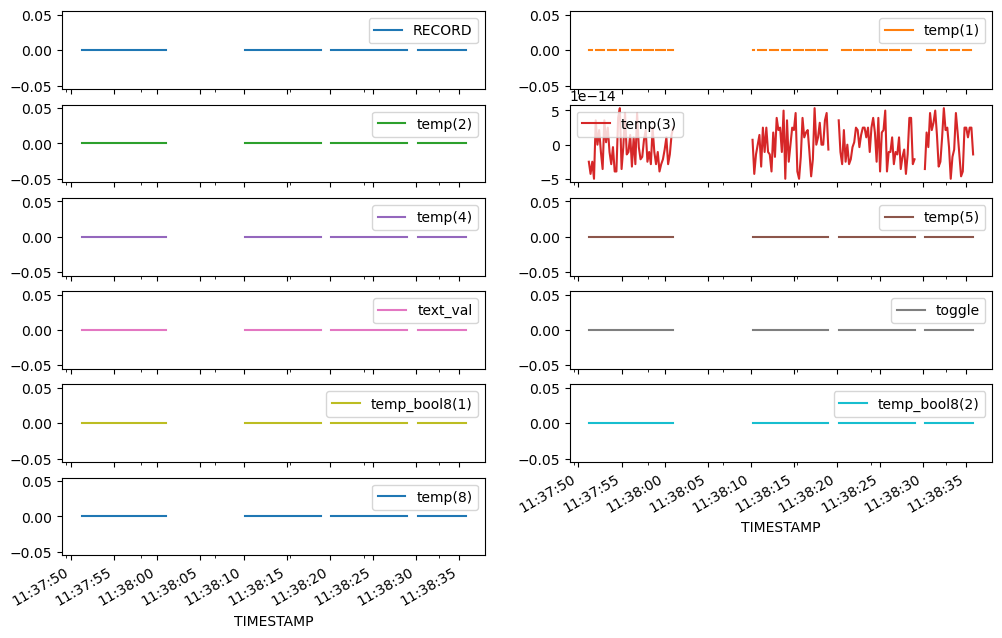

In [131]:
(ref_tob3.iloc[:my_tob3.shape[0], 0] - my_tob3).plot(subplots=True, layout=(ceil(len(ref_tob3.columns) / 2), 2), figsize=(12, 8))